<a href="https://colab.research.google.com/github/Ankit-07-chy/Data-Science/blob/main/251_KNN_from_scrach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
link = 'https://raw.githubusercontent.com/Simatwa/movies-dataset/main/data/drama.csv'
df = pd.read_csv(link)
df.head()

,genre,category,title,year,distribution,description,url,cover_photo
0,Drama,Hollywood,The Lion King 2019,2019,BluRay,"After the murder of his father, a young lion p...",https://fzmovies.net/movie-The%20Lion%20King%2...,https://fzmovies.net/imdb_images/The.Lion.King...
1,Drama,Hollywood,Black Panther Wakanda Forever,2022,BluRay,The people of Wakanda fight to protect their h...,https://fzmovies.net/movie-Black%20Panther%20W...,https://fzmovies.net/imdb_images/Black.Panther...
2,Drama,Hollywood,Fifty Shades of Grey,2015,BluRay,Literature student Anastasia Steele's life cha...,https://fzmovies.net/movie-Fifty%20Shades%20of...,https://fzmovies.net/imdb_images/%20Fifty.Shad...
3,Drama,Hollywood,Bloodshot 2020,2020,BluRay,"Ray Garrison, an elite soldier who was killed ...",https://fzmovies.net/movie-Bloodshot%202020--h...,https://fzmovies.net/imdb_images/Bloodshot.202...
4,Drama,Hollywood,After,2019,BluRay,"Based on Anna Todd's novel, AFTER follows Tess...",https://fzmovies.net/movie-After%20--hmp4.htm,https://fzmovies.net/imdb_images/After.2019.jpg


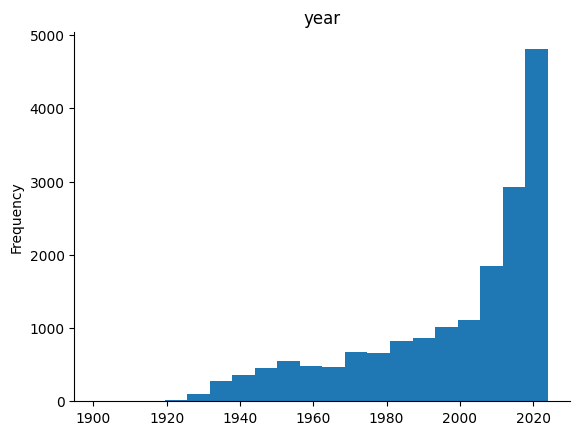

In [4]:
# @title year

from matplotlib import pyplot as plt
df['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
print(df['genre'].value_counts())

genre
Drama    17434
Name: count, dtype: int64


In [7]:
url = "https://raw.githubusercontent.com/vjvishaljha/Social-Networks-Ads/master/Social_Network_Ads.csv"
df = pd.read_csv(url)

In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [16]:
# will work on Gender, Age, ES
df1 = df[['Gender','Age','EstimatedSalary','Purchased']]

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['Gender'] = encoder.fit_transform(df1['Gender'])

/tmp/ipython-input-22-551621783.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Gender'] = encoder.fit_transform(df1['Gender'])


In [23]:
df1.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [25]:
X = df1.iloc[:,0:3].values

In [26]:
X

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]])

In [27]:
# scaling
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
y = df1['Purchased']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
accuracy_score(y_test,classifier.predict(X_test))

0.95

In [4]:
# code the knn from scratch
class KNN:
  def __init__(self,k):
    self.n_neighbours = k
    self.X_train = None
    self.y_train = None
  def fit(self,X_train,y_train):
    self.X_train = X_train
    self.y_train = y_train
  def predict(self,X_test):
    for i in range(len(X_test)):
      distances = []
      for j in range(len(self.X_train)):
        distances.append(self.calculate_distance(i,j))
      sorted(list(enumerate(distances)),key=lambda x:x[1])[0:self.n_neighbours]


  def calculate_distance(self,i,j):
    return np.sqrt(np.sum((self.X_train[i]-self.X_train[j])**2))